# Pymaceuticals Inc.
---

### Analysis

- See statistics summary (summary_statistics_df) and various data visualizations below for visual summary of various aspects of this study's results
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print(mouse_metadata.head())
#print(mouse_metadata.shape)
#print(study_results.head())
#print(study_results.shape)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(
    study_results, mouse_metadata, how="left", on=["Mouse ID"]
)
#print(mouse_study_data.shape)

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

dup_mouse_id = mouse_study_data[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
dup_mouse_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse_id_all_data = mouse_study_data[mouse_study_data["Mouse ID"] == "g989"]
dup_mouse_id_all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_data = mouse_study_data[mouse_study_data["Mouse ID"].isin(dup_mouse_id) == False]
clean_mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

means = clean_mouse_study_data.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
medians = clean_mouse_study_data.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
variances = clean_mouse_study_data.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
stdevs = clean_mouse_study_data.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
sems = clean_mouse_study_data.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)": means,
    "Median Tumor Volume (mm3)": medians,
    "Tumor Volume (mm3) Variance": variances,
    "Tumor Volume (mm3) Standard Deviation": stdevs,
    "Tumor Volume (mm3) SEM": sems,
})
summary_statistics_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_study_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

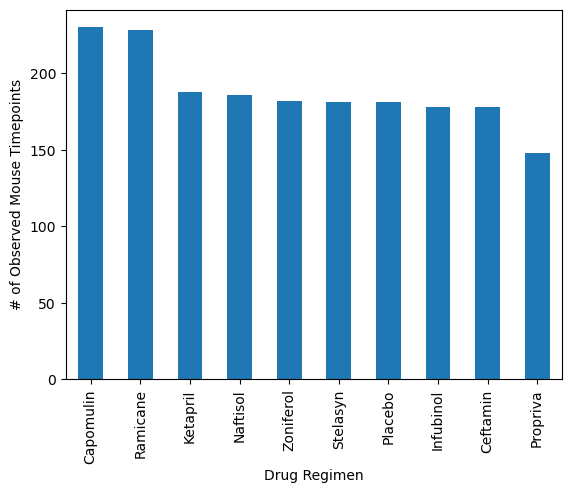

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_count = clean_mouse_study_data["Drug Regimen"].value_counts()

mouse_id_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

<function matplotlib.pyplot.show(close=None, block=None)>

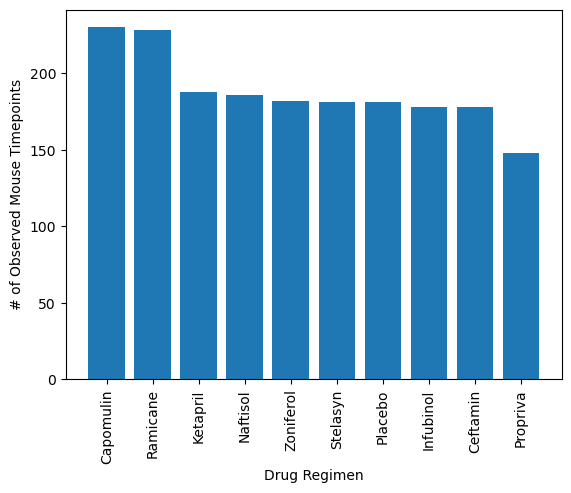

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_id_count.index.values, mouse_id_count.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

Text(0, 0.5, 'Sex Proportion')

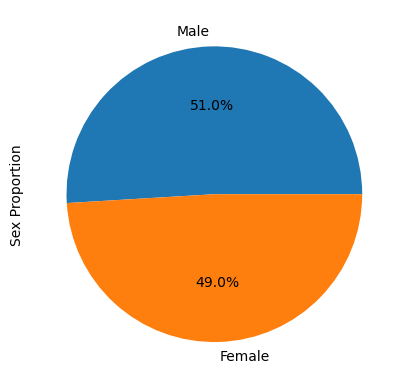

In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex_counts = clean_mouse_study_data.Sex.value_counts()

# Make the pie chart
mouse_sex_counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex Proportion")

Text(0, 0.5, 'Sex Proportion')

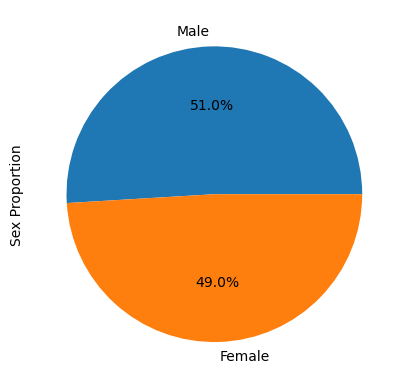

In [20]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex_counts = clean_mouse_study_data.Sex.value_counts()

# Make the pie chart
plt.pie(mouse_sex_counts.values, labels = mouse_sex_counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex Proportion")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_size_data = clean_mouse_study_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor_size_data = max_tumor_size_data.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_data_final = max_tumor_size_data.merge(clean_mouse_study_data, on=["Mouse ID", "Timepoint"], how="left")
mouse_study_data_final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    mouse_study_data_final_tumor_vol = mouse_study_data_final.loc[mouse_study_data_final["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(mouse_study_data_final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = mouse_study_data_final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.4 * iqr)

    outliers = mouse_study_data_final_tumor_vol.loc[(mouse_study_data_final_tumor_vol < lower_bound) | (mouse_study_data_final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers {outliers}")

Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


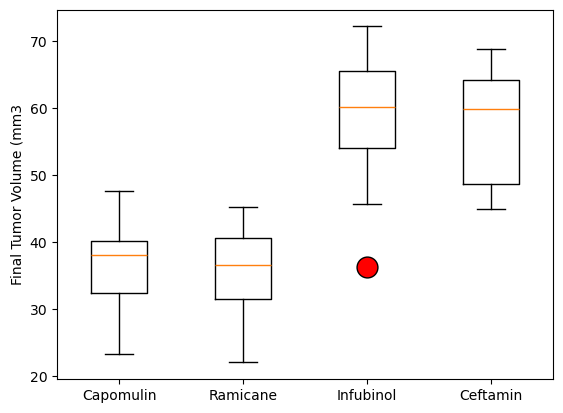

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor="red", markersize=15)
plt.boxplot(tumor_vol_data, labels = treatment_list, flierprops=orange_out)
plt.ylabel("Final Tumor Volume (mm3")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

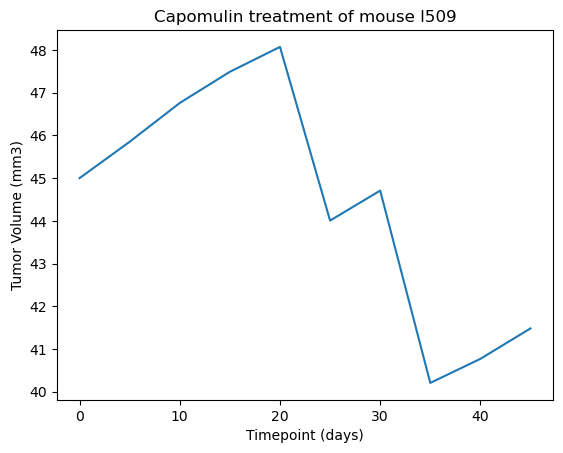

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_mouse_study_data[clean_mouse_study_data["Drug Regimen"] == "Capomulin"]
mouse_l509_capomulin = capomulin_data[capomulin_data["Mouse ID"] == "l509"]
plt.plot(mouse_l509_capomulin["Timepoint"], mouse_l509_capomulin["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

Text(0.5, 1.0, 'Capomulin Treatment Average Tumor Volume vs Mouse Weight')

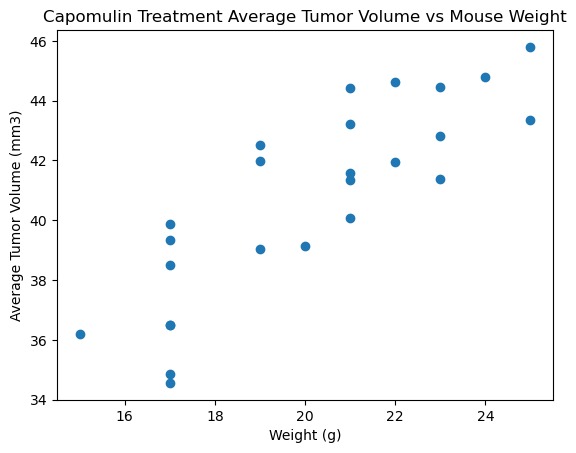

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data_mean = capomulin_data.groupby(["Mouse ID"]).mean(numeric_only=True)
capomulin_data_mean

plt.scatter(capomulin_data_mean["Weight (g)"], capomulin_data_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment Average Tumor Volume vs Mouse Weight")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


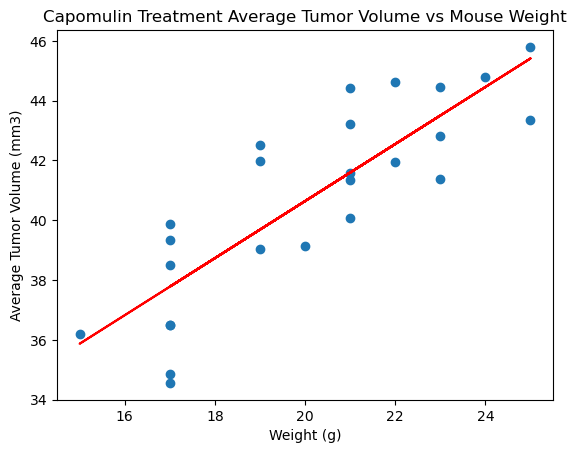

In [22]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_data_mean["Weight (g)"], capomulin_data_mean["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

model = st.linregress(capomulin_data_mean["Weight (g)"], capomulin_data_mean["Tumor Volume (mm3)"])
slope = model[0]
intercept = model[1]
y_values = capomulin_data_mean["Weight (g)"] * slope + intercept
plt.scatter(capomulin_data_mean["Weight (g)"], capomulin_data_mean["Tumor Volume (mm3)"])
plt.plot(capomulin_data_mean["Weight (g)"], y_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment Average Tumor Volume vs Mouse Weight")
plt.show()